### Aim of anlysis
After viewing all forests in the world and characteristics of tropical dry forests. I want to perform analysis on the <b>Southern New Guinea freshwater swamp forest</b>

In [1]:
from shapely.geometry import mapping
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray as rxr
import earthpy as et
import rasterio
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import requests

In [2]:
class Read():
    def __init__(self, url, columns = None):
        self.url = url
        self.columns = columns
        
    def retrieve_data(self):
        self.req = requests.get(self.url)
        self.req = str(self.req.text)

    def wrangle(self, online = False, change_columns = False, new_columns = None, replace_values = False,
               column_to_replace= None, replacing_values = None):
        if online:
            self.url = self.req
        self.df = gpd.read_file(self.url)
        if change_columns:
            self.df = self.df[self.columns]
            self.df.columns = new_columns
        self.df = self.df.replace(['n/a', 'Unknown'], np.nan)
        self.df.columns = self.df.columns.str.lower()
        if replace_values:
            self.df[column_to_replace] = self.df[column_to_replace].replace(replacing_values)
        self.df['centroid'] = self.df.geometry.centroid
        self.df.crs = {'init' :'epsg:4326'}
        return self.df

In [3]:
def plot(data, column):
    data.plot(column = column, legend = True, cmap = 'winter',
          legend_kwds = {'ncol': 2, 'loc' : 'center', 'bbox_to_anchor': (1.5, 0.5)})
    plt.xlim(-20,20)

In [4]:
def plot_within(data, column, title, ncol):
    ax = data.plot(column = column,  figsize= (20, 8), legend = True, cmap = 'winter',
                        legend_kwds = {'ncol': ncol, 'loc' : 'center', 'bbox_to_anchor': (1.2, 0.5)})
    fav_forest.plot(ax = ax, color = 'brown')
    plt.title(title, fontdict = {'fontsize' : 18});

In [5]:
fav_forest = Read('data/Southern New Guinea freshwater swamp forest.geojson')
fav_forest = fav_forest.wrangle()

fav_forest.head(2)

,eco_name,biome,geometry,centroid
0,Southern New Guinea freshwater swamp forests,Tropical and subtropical moist broadleaf forests,"MULTIPOLYGON (((-71.50326 19.64724, -71.51349 ...",POINT (-71.50366 19.67890)
1,Southern New Guinea freshwater swamp forests,Tropical and subtropical moist broadleaf forests,"POLYGON ((-86.86259 21.00049, -86.86257 21.007...",POINT (-86.81104 21.07838)


In [6]:
print(f"biomes of Southern New Guinea freshwater swamp forests are:{list(fav_forest['biome'].unique())}")

biomes of Southern New Guinea freshwater swamp forests are:['Tropical and subtropical moist broadleaf forests']


### Administrative

In [7]:
columns = ['CONTINENT','NAME_LONG', 'SUBREGION', 'geometry']
new_columns = ['continent', 'country', 'SUBREGION', 'geometry']
world_data = Read('zip://data/ne_110m_admin_0_countries.zip', columns)
world_data = world_data.wrangle(change_columns = True, new_columns = new_columns)
continent = world_data[world_data['continent'] == 'Africa']
subregion = continent[continent['subregion'] == 'Western Africa']

continent.head(2)

,continent,country,subregion,geometry,centroid
1,Africa,Tanzania,Eastern Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)
2,Africa,Western Sahara,Northern Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)


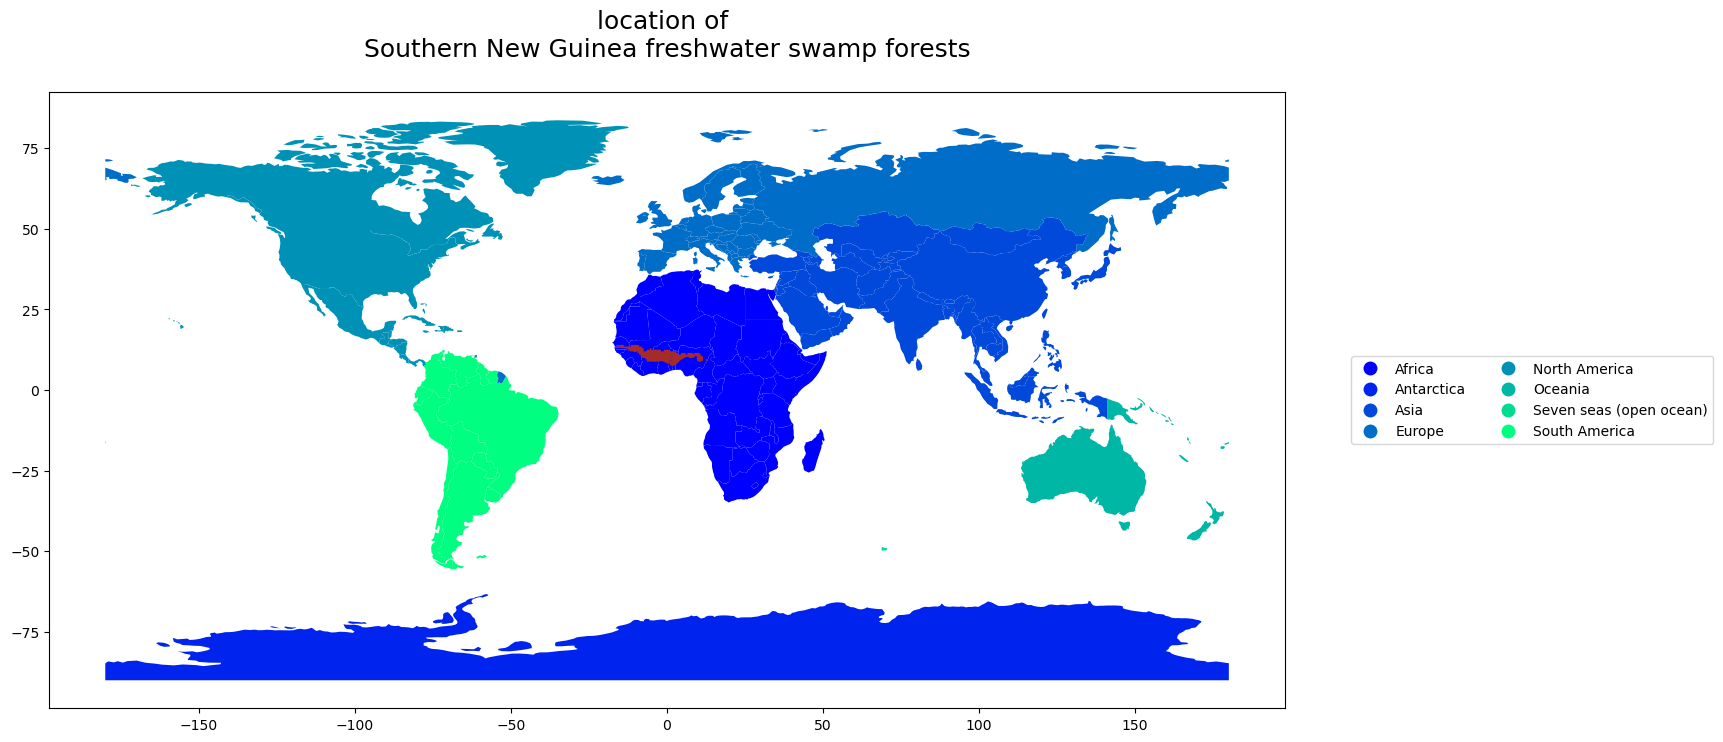

In [8]:
plot_within(world_data, 'continent', 'location of \nSouthern New Guinea freshwater swamp forests\n', 2)

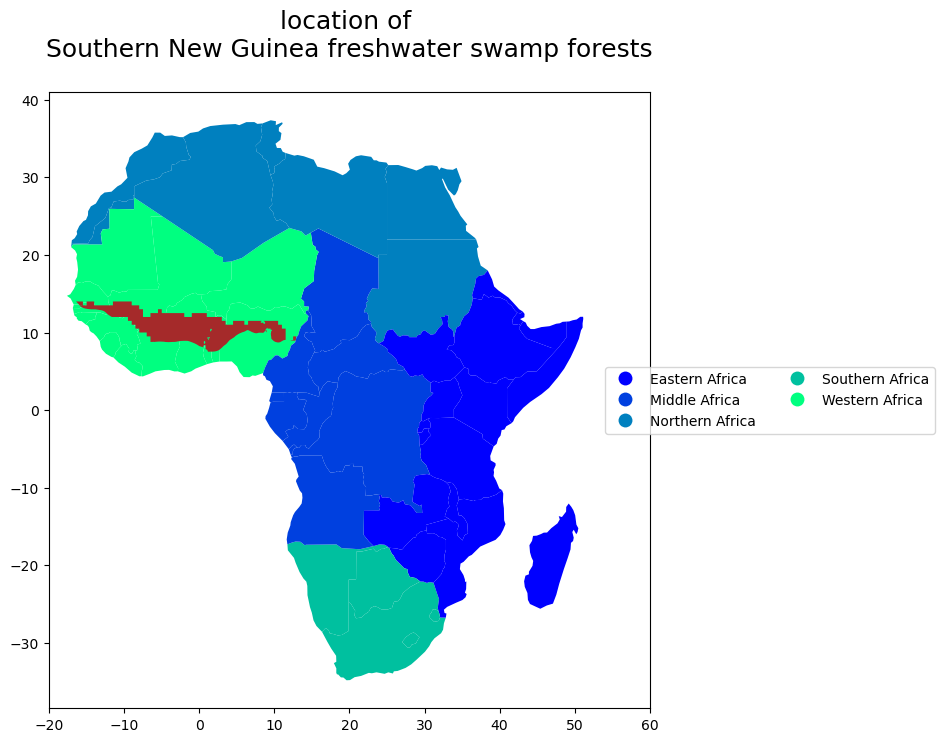

In [9]:
plot_within(continent, 'subregion', 'location of \nSouthern New Guinea freshwater swamp forests\n', 2)
plt.xlim(-20,60);

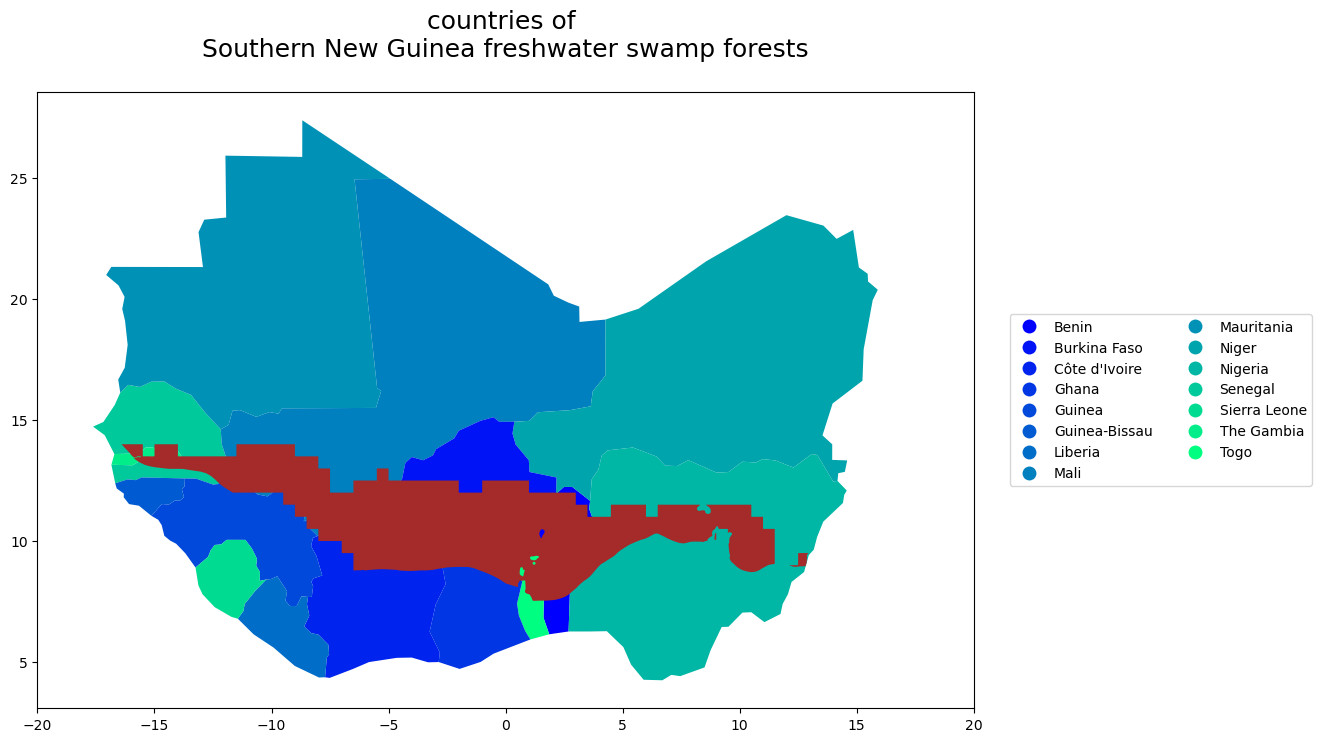

In [10]:
plot_within(subregion, 'country', 'countries of \nSouthern New Guinea freshwater swamp forests\n', 2)
plt.xlim(-20,20);

### AgroEcological zones

In [11]:
path = 'data/Bioclimatic and ecological zones/GlobalAgroEcologicalZones_GAEZ.geojson'
agros = {1: 'Steep terrain', 2: 'Artic/Cold', 3: 'Desert/Arid', 4: 'Irrigated Soils', 5: 'Hydromorphic soils', 
 6: 'Dry, good soils', 7: 'Dry, moderate soils', 8: 'Dry, poor soils', 9: 'Moist, good soils', 
 10: 'Moist, moderate soils', 11: 'Moist, poor soils', 12: 'Sub-humid, good soils', 13: 'Sub-humid, moderate soils', 
 14: 'Sub-humid, poor soils', 15: 'Humid, good soils', 16: 'Humid, moderate soils',
         17: 'Humid, poor soils', 18:'Water'}

agroeco_df = Read(path)
agroeco_df = agroeco_df.wrangle(replace_values = True, column_to_replace = 'value',
                                replacing_values =agros)
gaez = gpd.clip(agroeco_df, fav_forest)
gaez.head()

,value,geometry,centroid
81765,Irrigated Soils,"POLYGON ((-70.90000 19.50000, -71.00000 19.500...",POINT (-70.94286 19.50000)
81660,"Sub-humid, moderate soils","POLYGON ((11.40000 9.85000, 11.40000 9.75000, ...",POINT (-71.83167 19.58500)
81665,Steep terrain,"POLYGON ((11.40000 9.75000, 11.40000 9.85000, ...",POINT (-70.69643 19.60357)
81664,"Sub-humid, good soils","POLYGON ((9.55000 9.90000, 9.60000 9.90000, 9....",POINT (-70.87500 19.62500)
81663,"Sub-humid, moderate soils","POLYGON ((11.15000 9.75000, 11.15000 9.65000, ...",POINT (-71.02500 19.62500)


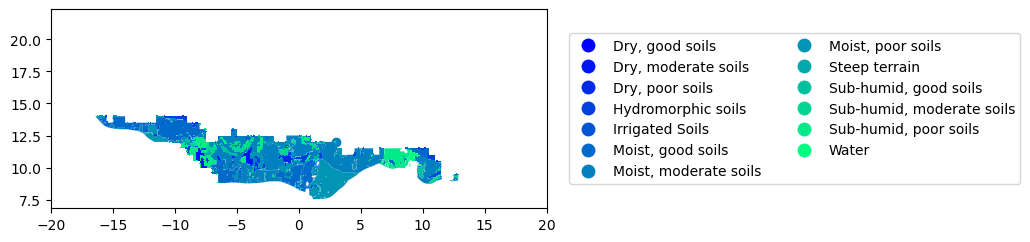

In [12]:
plot(gaez, 'value')

### climate

###### Climate

In [13]:
climates = {1: 'Warm Temperate Moist', 2: 'Warm Temperate Dry', 3: 'Cool Temperate Moist', 4: 'Cool Temperate Dry', 
5: 'Polar Moist', 6: 'Polar Dry', 7: 'Boreal Moist', 8: 'Boreal Dry', 9: 'Tropical Montane', 10: 'Tropical wet',
 11: 'Tropical Moist', 12: 'Tropical Dry'}

In [14]:
url = 'data/climate/IPCC_ClimateZoneMap_Vector.geojson'

climate = Read(url)
climate = climate.wrangle(replace_values = True, column_to_replace = 'class_name',
               replacing_values = climates)
clim = gpd.clip(climate, fav_forest)
clim = clim.drop((clim[clim['class_name'] == 0]).index)
clim.head()

,class_name,geometry,centroid
20423,Tropical Moist,"POLYGON ((10.85000 9.50000, 10.85000 9.40000, ...",POINT (10.80000 9.45000)
20408,Tropical Moist,"POLYGON ((11.15000 9.60000, 11.15000 9.50000, ...",POINT (11.12500 9.55000)
20440,Tropical Montane,"POLYGON ((8.65000 10.15000, 8.72503 10.15000, ...",POINT (8.93947 9.58840)
20250,Tropical Montane,"POLYGON ((8.90000 10.50000, 8.94546 10.50000, ...",POINT (8.95000 10.45000)
22736,Tropical Dry,GEOMETRYCOLLECTION (POLYGON ((12.75000 9.25000...,POINT (14.83832 19.08908)


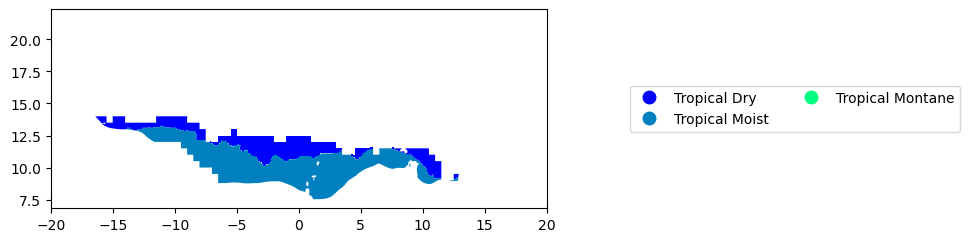

In [15]:
plot(clim, 'class_name')

In [16]:
clim = clim.drop((clim[clim['class_name'] == 0]).index)

###### Climate_shifts

In [17]:
def climate_shifts(year, scenario):
    replace = {
    11: 'Af', 12 :'Am', 13 : 'As', 14 : 'Aw', 21 : 'BWk', 22 : 'BWh', 26 : 'BSk', 27 : 'BSh',
    31 : 'Cfa', 32 : 'Cfb', 33 : 'Cfc', 34 : 'Csa', 35 : 'Csb', 36 : 'Csc', 37 : 'Cwa', 38 : 'Cwb', 
    39 : 'Cwc', 41 : 'Dfa', 42 : 'Dfb', 43 : 'Dfc', 44 : 'Dfd', 45 : 'Dsa', 46 : 'Dsb', 47 :'Dsc', 
    48 :'Dsd', 49 : 'Dwa', 50 : 'Dwb', 51 : 'Dwc', 52 : 'Dwd', 61 : 'EF', 62 :'ET',
    }
    if scenario:
        clim_shift = Read(f'data/climate/KoppenGeigerClimateShifts/{year}-{scenario}.geojson')
    else:   
        clim_shift = Read(f'data/climate/KoppenGeigerClimateShifts/{year}.geojson')
    clim_shift = clim_shift.wrangle(replace_values = True,
               column_to_replace= 'gridcode', replacing_values = replace)
    forest_clim_shift = gpd.clip(clim_shift, fav_forest)
    return forest_clim_shift

In [18]:
def plot_climate_shifts(years, scenario, title):
    fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15,10))
    for i in range(len(years)):
        if scenario:
            climate_shifts(years[i], scenario).plot(column = 'gridcode', ax = ax[i], cmap = 'winter',
                                                    legend = True)
        else:
            climate_shifts(years[i], None).plot(column = 'gridcode', ax = ax[i], cmap = 'winter',
                                                legend = True)
        ax[i].set_title(years[i], fontdict = {'fontsize': 10})
    for ax in ax.flat:
        ax.axis('off')
        ax.set_xlim(left=-20, right=20)
        ax.set_ylim(bottom=0, top=20)
    plt.suptitle(title, y =0.7,
                 size = 24)
    fig.tight_layout(pad = 0.2)

<b>1901 - 2000 (No scenarios)

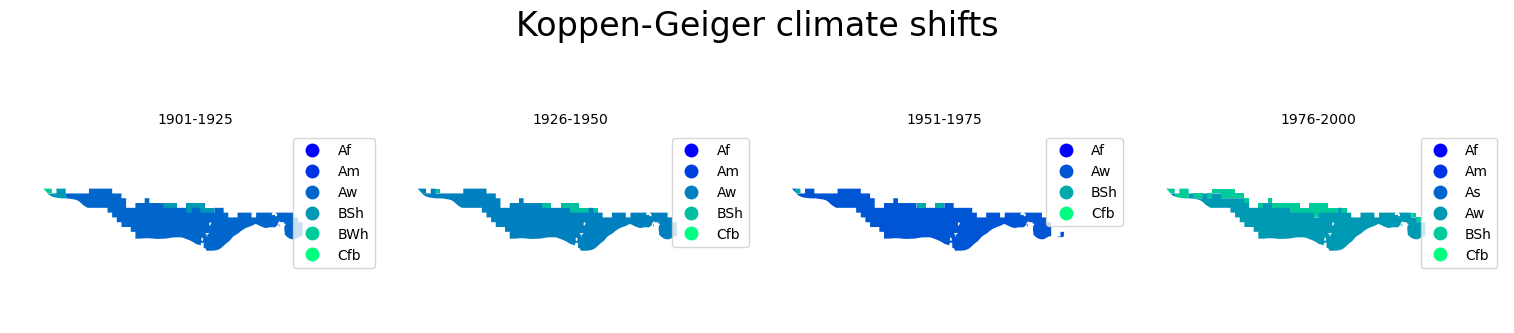

In [19]:
years = ['1901-1925', '1926-1950', '1951-1975', '1976-2000']
plot_climate_shifts(years, None, 'Koppen-Geiger climate shifts',)

<b>A1F1

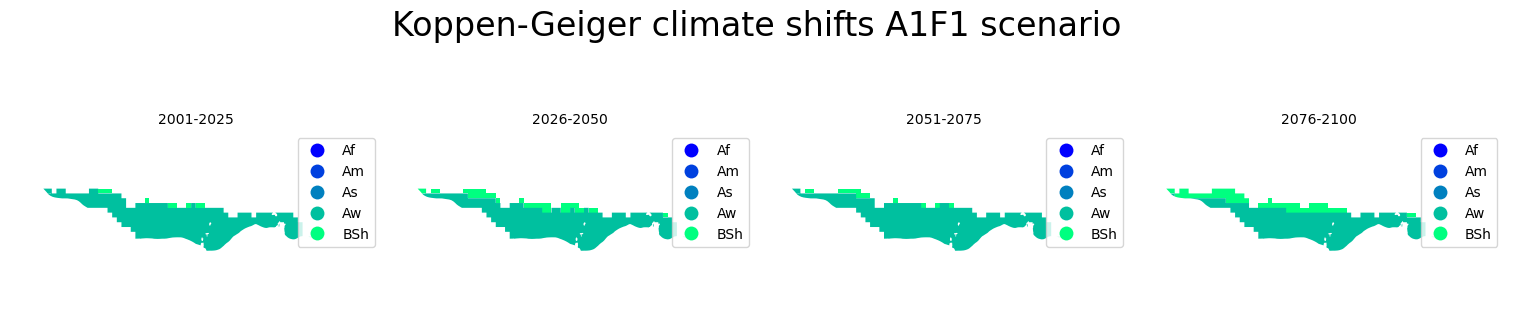

In [20]:
years = ['2001-2025', '2026-2050', '2051-2075', '2076-2100']
plot_climate_shifts(years, 'A1FI', 'Koppen-Geiger climate shifts A1F1 scenario')

<b>A2

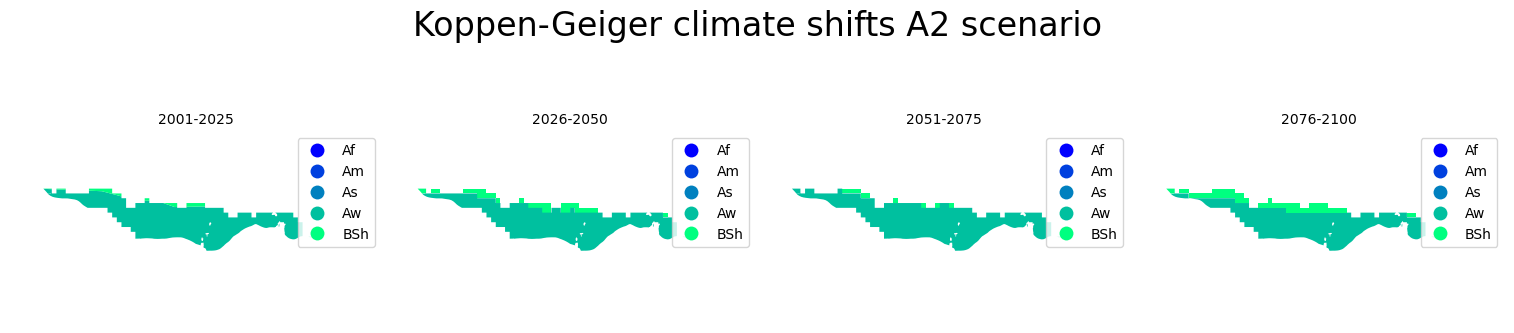

In [21]:
years = ['2001-2025', '2026-2050', '2051-2075', '2076-2100']
plot_climate_shifts(years, 'A2', 'Koppen-Geiger climate shifts A2 scenario')

<b>B1

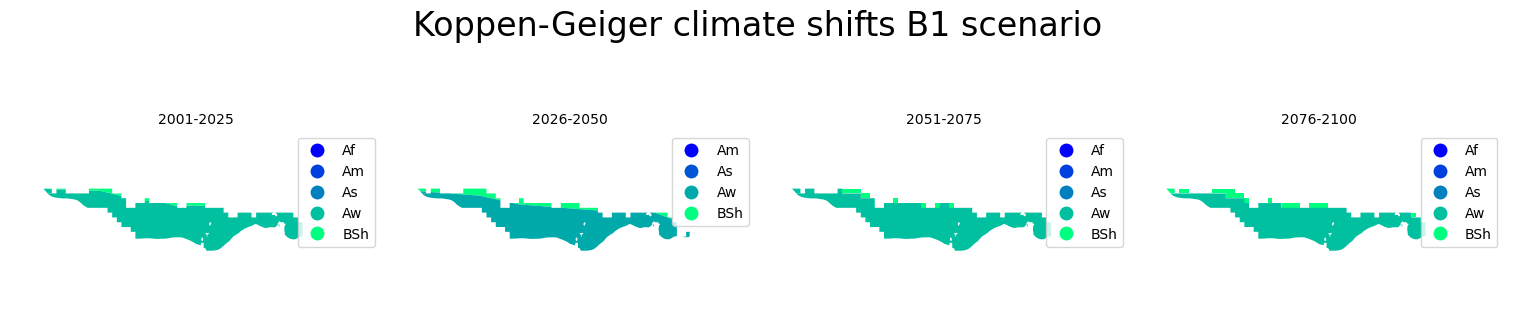

In [22]:
years = ['2001-2025', '2026-2050', '2051-2075', '2076-2100']
plot_climate_shifts(years, 'B1', 'Koppen-Geiger climate shifts B1 scenario')

<b>B2

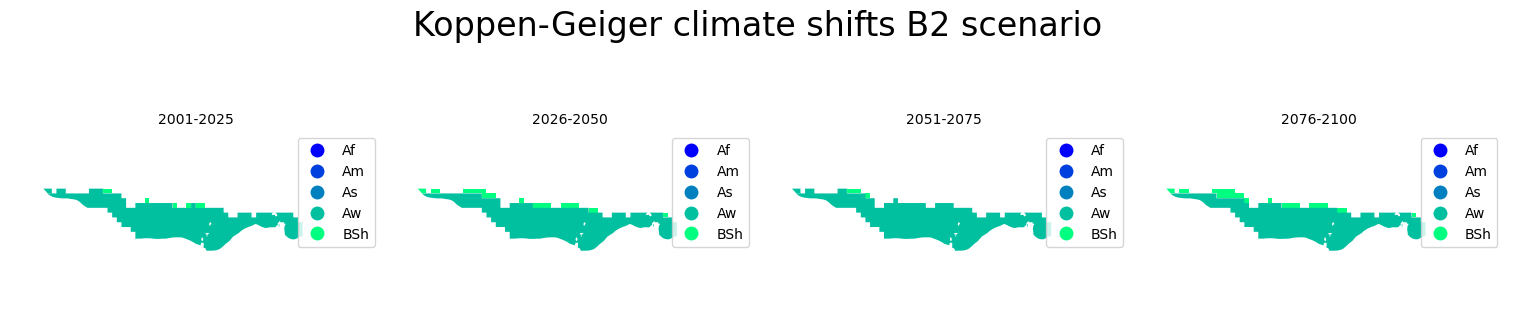

In [23]:
years = ['2001-2025', '2026-2050', '2051-2075', '2076-2100']
plot_climate_shifts(years, 'B2', 'Koppen-Geiger climate shifts B2 scenario')

In [24]:
def read_tiff(data, title):
    f, ax = plt.subplots(1, 2, figsize=(10, 4))
    for i in range(len(data)):
        path = f'data/Bioclimatic and ecological zones/{data[i]}.tif'
        tiff_data = rxr.open_rasterio(path, masked=True).squeeze()
        clipped1 = tiff_data.rio.clip(fav_forest.geometry.apply(mapping),
                                          # This is needed if your GDF is in a diff CRS than the raster data
                                          fav_forest.crs)
        fav_forest.plot(ax = ax[i], color = 'brown')
        clipped1.plot(ax=ax[i], cmap = 'winter')
        ax[i].set_title(data[i], fontdict = {'fontsize': 10})
    for ax in ax.flat:
        ax.axis('off')
        ax.set_xlim(left=-20, right=20)
        ax.set_ylim(bottom=0, top=20)
    plt.suptitle(title, y = 1.2,
                 size = 24)
    f.tight_layout(pad = 0.2)

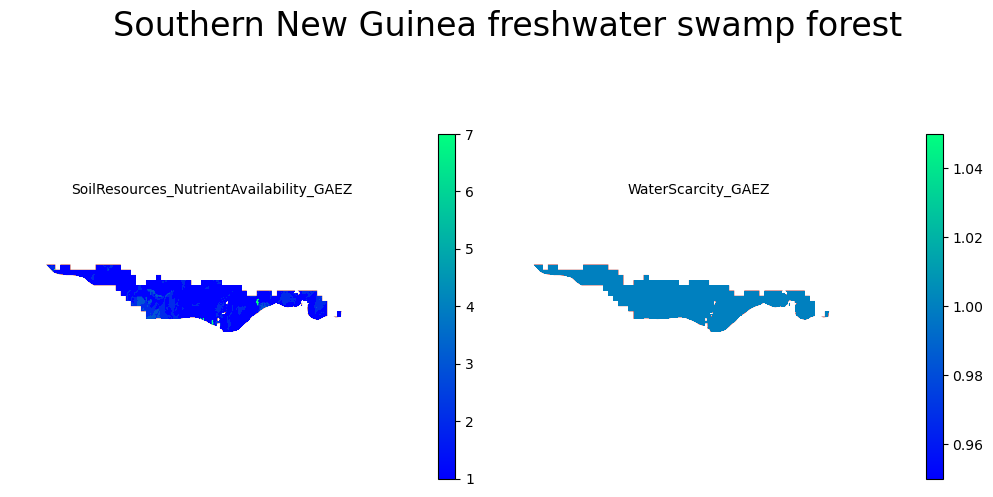

In [25]:
read_tiff(['SoilResources_NutrientAvailability_GAEZ',
          'WaterScarcity_GAEZ'], 'Southern New Guinea freshwater swamp forest')

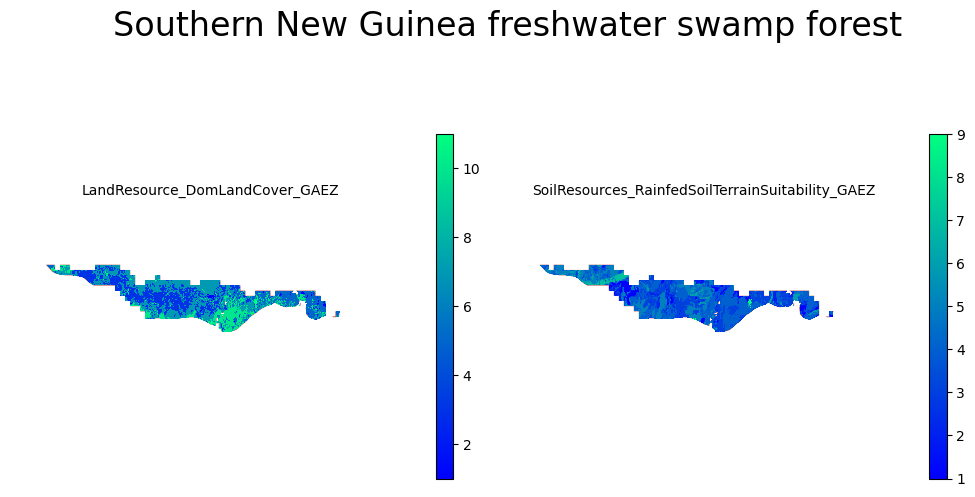

In [26]:
read_tiff(['LandResource_DomLandCover_GAEZ',
          'SoilResources_RainfedSoilTerrainSuitability_GAEZ'], 'Southern New Guinea freshwater swamp forest')

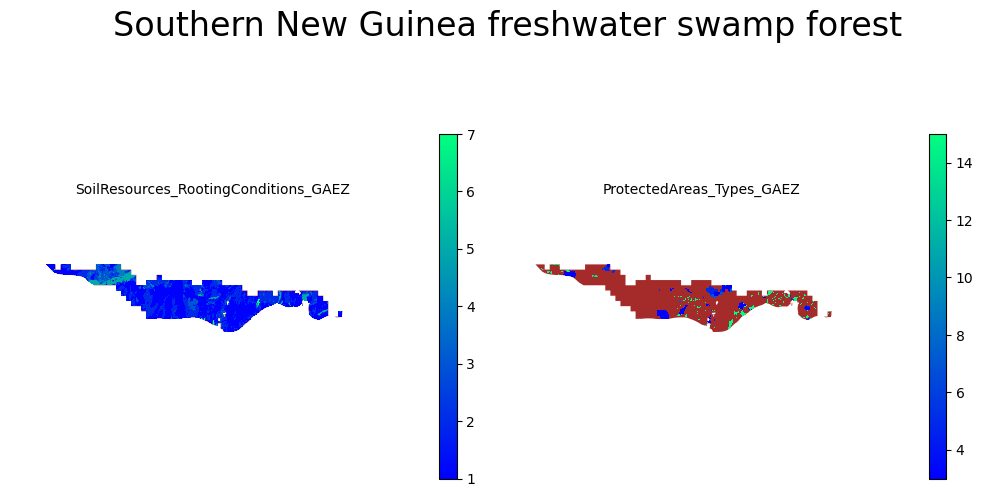

In [27]:
read_tiff(['SoilResources_RootingConditions_GAEZ',
          'ProtectedAreas_Types_GAEZ'], 'Southern New Guinea freshwater swamp forest')

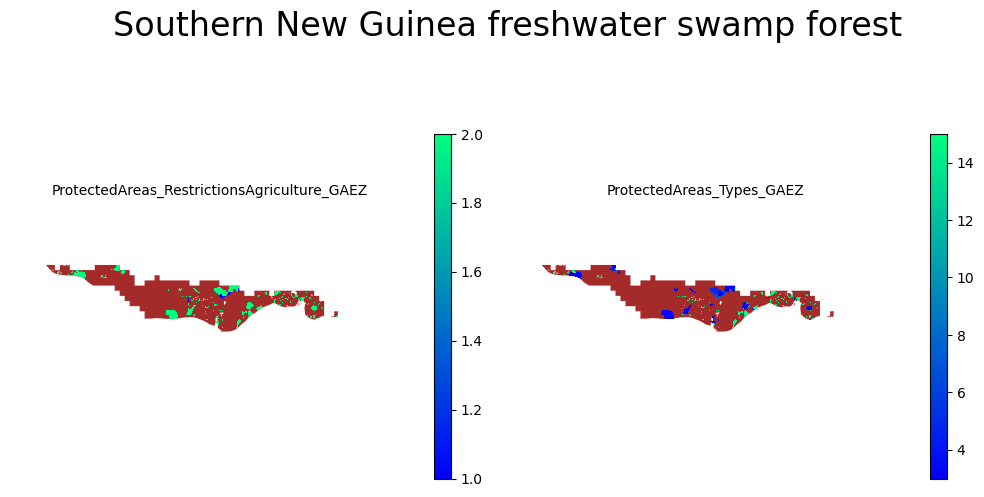

In [28]:
read_tiff(['ProtectedAreas_RestrictionsAgriculture_GAEZ',
          'ProtectedAreas_Types_GAEZ'], 'Southern New Guinea freshwater swamp forest')

 ##### Forests

<b>Managed forests concession

In [29]:
def plot_within(data, column = None):
    ax = fav_forest.plot(figsize= (20, 8))
    data.plot(ax = ax, cmap = 'winter', column = column, legend = True)
    plt.title('title', fontdict = {'fontsize' : 18});

In [30]:
url = 'https://datasets.mojaglobal.workers.dev/0:/LandCover/Forest/ManagedForestConcessions/ManagedForestConcessions_LBR.geojson'
forest_concession = Read(url)
forest_concession.retrieve_data()
forest_concession = forest_concession.wrangle(online = True)
forest_concession.head(2)

,id,objectid,country,name,company,group_comp,group_coun,legal_term,status,province,source,last_updat,shape_leng,area_geo,shape_length,shape_area,geometry,centroid
0,47,47,LBR,FMC a,,,,,,,,,1.998015,1.143232e+09,1.998015,0.093627,"POLYGON ((-9.63809 7.58342, -9.67405 7.61019, ...",POINT (-9.71605 7.35382)
1,48,48,LBR,FMC b,,,,,,,,,1.157871,5.563628e+08,1.157871,0.045417,"POLYGON ((-9.44694 5.81031, -9.51802 5.82799, ...",POINT (-9.41711 5.68310)


(-20.0, 20.0)

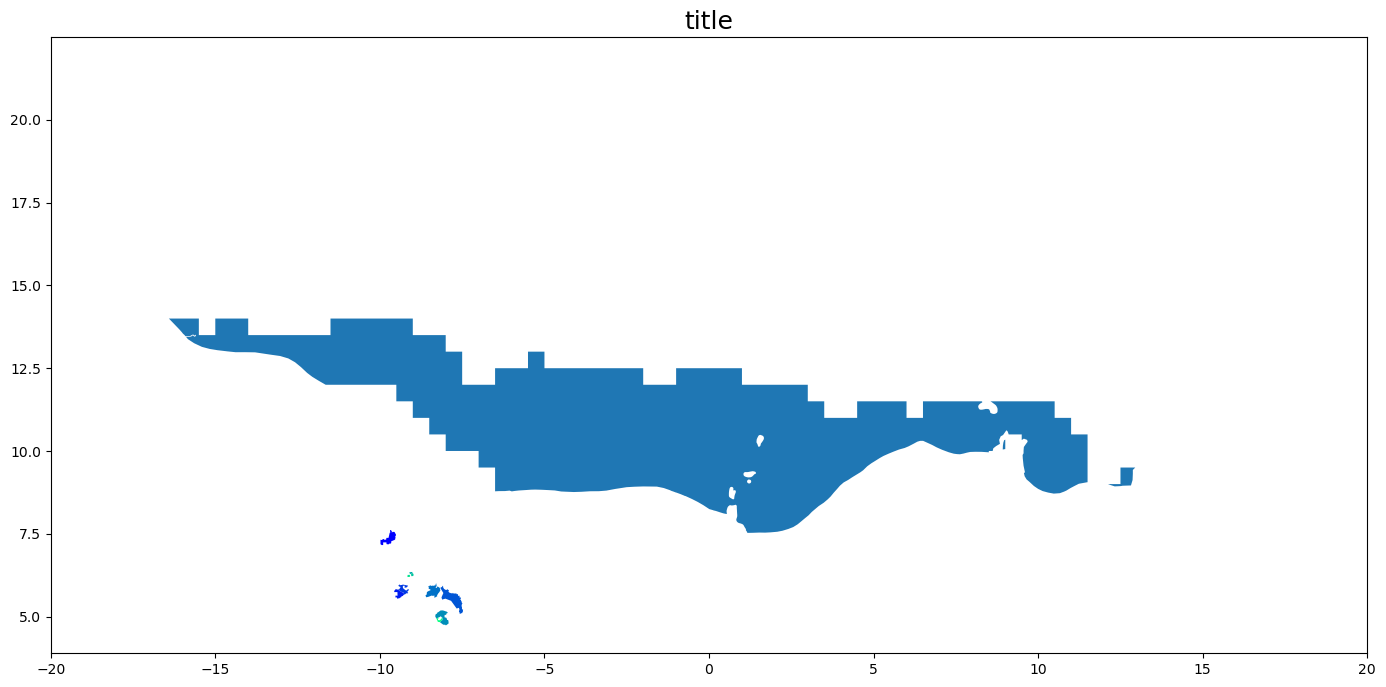

In [31]:
plot_within(forest_concession, )
plt.xlim(-20, 20)

data on managed forest concession for liberia want to check if the forest covers it

In [32]:
soil_resource = Read('https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson')
soil_resource.retrieve_data()
soil_resource = soil_resource.wrangle(online = True)
soil_resource = gpd.clip(soil_resource, fav_forest)
soil_resource.head()
# soil_resources.append(soil_resource)
# soil = gpd.GeoDataFrame( pd.concat(soil_resources, ignore_index=True) )

,sname,ipcc,geometry,centroid
32,WAT,Waterbodies,"MULTIPOLYGON (((-97.65724 21.64268, -97.65744 ...",POINT (-7.03050 40.05349)
19,LP,Leptosol,"MULTIPOLYGON (((-86.78835 21.05158, -86.79645 ...",POINT (46.24798 32.16133)
29,SC,Solonchak,"POLYGON ((-13.66273 13.46387, -13.83254 13.294...",POINT (32.76967 7.95292)
31,VR,Vertisol,"MULTIPOLYGON (((-71.71528 19.72417, -71.72058 ...",POINT (66.75923 0.32992)
22,LX,Lixisol,"MULTIPOLYGON (((-14.02358 13.80349, -14.11379 ...",POINT (31.59579 0.76833)


(-20.0, 20.0)

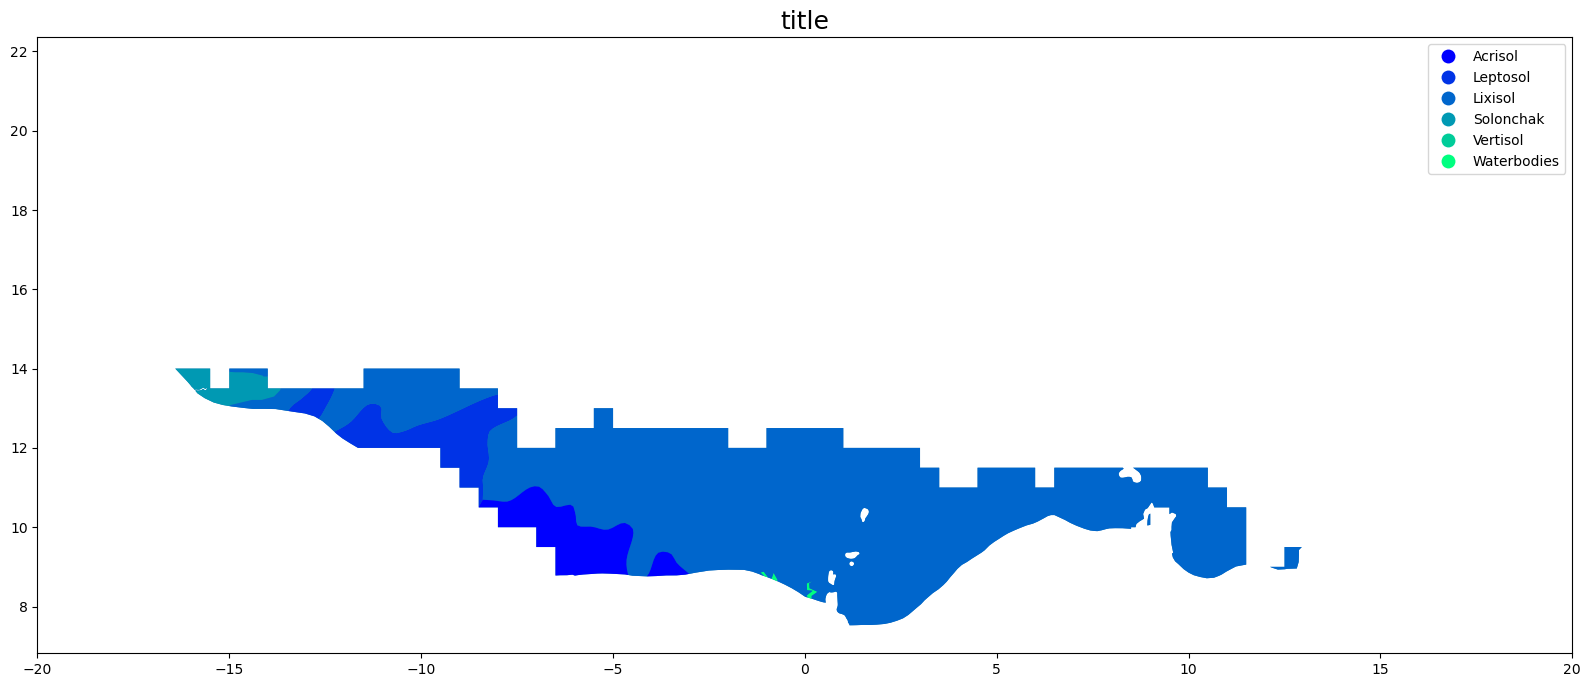

In [33]:
plot_within(soil_resource, 'ipcc')
plt.xlim(-20, 20)

Text(0.5, 1.0, 'a')

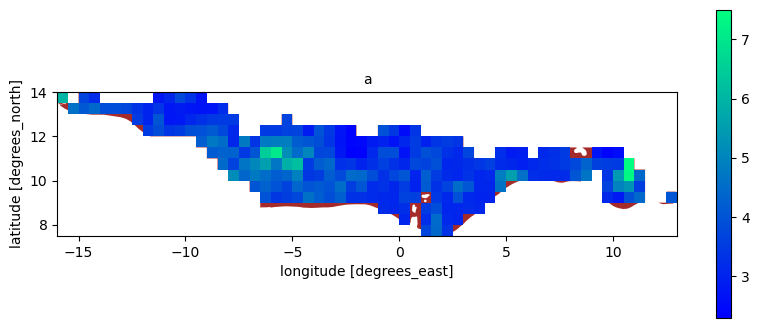

In [34]:
f, ax = plt.subplots(figsize=(10, 4))
path = f'data/soil/GlobalSoilOrganicCarbonDensityinkgCm_1mDepth.tif'
tiff_data = rxr.open_rasterio(path, masked=True).squeeze()
clipped1 = tiff_data.rio.clip(fav_forest.geometry.apply(mapping),
                                          # This is needed if your GDF is in a diff CRS than the raster data
                                          fav_forest.crs)
fav_forest.plot(ax = ax, color = 'brown')
clipped1.plot(ax=ax, cmap = 'winter')
ax.set_title('a', fontdict = {'fontsize': 10})